# K means clustering - Lab

## Introduction

In this lab, we'll learn how to use scikit-learn's implementation of the K-Means Clustering algorithm to analyze a dataset!

## Objectives

You will be able to:

* Demonstrate an understanding of how the K-Means Clustering algorithm works
* Perform K-Means Clustering with scikit-learn and interpret results
* Use metrics such as Calinski Harabaz Scores (Variance Ratios) to determine the optimal number of clusters


## Understanding the K-Means Algorithm 

The k means clustering algorithm is an iterative algorithm that reaches for a pre-determined number of clusters within an unlabeled dataset, and basically works as follows:

- select k initial seeds
- assign each observation to the cluster to which it is "closest" 
- recompute the cluster centroids
- reassign the observations to one of the clusters according to some rule
- stop if there is no reallocation

## Creating a Dataset

For this lab, we'll create a synthetic dataset to work with, so that there are clearly defined clusters we can work with to see how well the algorithm performs. 

In the cell below:

* Import `make_blobs` from `sklearn.datasets`
* Import pandas, numpy, and matplotlib.pyplot, and set the standard alias for each. 
* Set matplotlib visualizations to display inline
* Use numpy to set a random seed of `1`.
* Import `KMeans` from `sklearn.cluster`

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1)
from sklearn.cluster import KMeans

Now, we'll use `make_blobs` to create our dataset. 

In the cell below:

* Call `make_blobs`, and pass in the following parameters:
    * `n_samples=400`
    * `n_features=2`
    * `centers=6`
    * `cluster_std=0.8`

In [3]:
X, y = make_blobs(n_samples=400,
                 n_features=2,
                 centers = 6,
                 cluster_std=0.8)

Now, let's visualize our clusters to see what we've created. Run the cell below to visualize our newly created "blob" dataset.

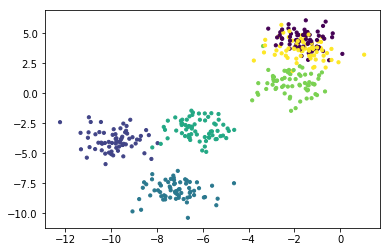

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10)

The nice thing about creating a synthetic dataset with `make_blobs` is that it can assign ground-truth clusters, which is why each of the clusters in the visualization above are colored differently. Because of this, we have a way to check the performance of our clustering results against the ground truth of the synthetic dataset. Note that this isn't something that we can do with real-world problems (because if we had labels, we'd likely use supervised learning instead!). However, when learning how to work with clustering algorithms, this provides a solid way for us to learn a bit more about how the algorithm works. 

## Using K-Means

Let's go ahead and create a `KMeans` object and fit it to our data. Then, we can explore the results provided by the algorithm to see how well it performs. 

In the cell below:

* Create a `KMeans` object, and set the `n_clusters` parameter to `6`.
* `fit()` the KMeans object to the data stored in `X`.
* Use the KMeans object to predict which clusters each data point belongs to by using the `Predict` method on the data stored in `X`.

In [6]:
k_means = KMeans(n_clusters=6)
k_means.fit(X)

predicted_clusters = k_means.predict(X)

Now that we have the predicted clusters, let's visualize them both and compare the two. 

In the cell below: 

* Create a scatter plot as we did up above, but this time, set `c=predicted_clusters`. The first two arguments and `s=10` should stay the same. 
* Get the cluster centers from the object's `.cluster_centers_` attribute. 
* Create another scatter plot, but this time, for the first two arguments, pass in `centers[:, 0]` and `centers[:, 1]`. Also set `c='black'` and `s=70`.

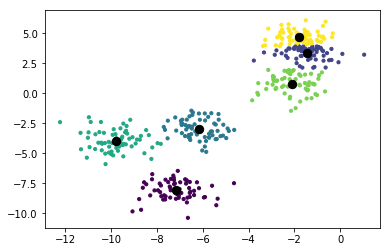

In [9]:
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=predicted_clusters, 
            s=10)

centers = k_means.cluster_centers_

plt.scatter(centers[:,0],
            centers[:,1],
            c='black',
            s=70)

**_Question:_**

In your opinion, do the centroids match up with the cluster centers?

Write your answer below this line:
__________________________________________________Ya_____________________________



## Tuning Parameters

As you can see, the k means algorithm is pretty good at identifying the clusters. Do keep in mind that for a real data set, you will not be able to evaluate the method as such, as we don't know a priori what the clusters should be. This is the nature of unsupervised learning. The Scikit learn documentation does suggest two methods to evaluate your clusters when the "ground truth" is not known: the Silhouette coefficient and the Calinski-Harabaz Index. We'll talk about them later, but first, let's look at the Scikit learn options when using the KMeans function.

The nice hing about the scikit learn k-means clustering algorithm is that certain parameters can be specified to tweak the algorithm. We'll discuss two important parameters which we haven't specified before: `init` and `algorithm`.

### 1. The `init` parameter

`init` specifies the method for initialization:

- `k-means++` is the default method, this method selects initial cluster centers in a smart way in order to pursue fast convergence.
- `random`: choose k random observations for the initial centroids.
- `ndarray`: you can pass this argument and provide initial centers.

### 2. The `algorithm` parameter

`algorithm` specifies the algorithm used:

- If `full` is specified, a full EM-style algorithm is performed. EM is short for "Expectation Maximization" and its name is derived from the nature of the algorithm, where in each iteration an E-step (in the context of K-means clustering, the points are assigned to the nearest center) and an M-step (the cluster mean is updated based on the elements of the cluster) is created. 
- The EM algorithm can be slow. The `elkan` variation is more efficient, but not available for sparse data.
- The default is `auto`, and automatically selects `full` for sparse data and `elkan` for dense data. 

### Dealing With an Unknown Number of Clusters

Now, let's create another dataset. This time, we'll randomly generate a number between 3 and 8 to determine the number of clusters, without us knowing what that value actually is. 

In the cell below:

* Create another dataset using `make_blobs`. Pass in the following parameters:
    * `n_samples=400`
    * `n_features=2`
    * `centers=np.random.randint(3, 8)`
    * `cluster_std = 0.8`

In [10]:
X_2, y_2 = make_blobs(n_samples=400,
                      n_features=2,
                      centers=np.random.randint(3, 8),
                      cluster_std = 0.8)

Now, we've created a dataset, but we don't know how many clusters actually exist in this dataset, so we don't know what value to set for K!

In order to figure out the best value for K, we'll create a different version of the clustering algorithm for each potential value of K, and find the best one using an **_Elbow Plot_**.   

First, we'll need to create a different 

In the cell below, create and fit each `KMeans` object. Each one should be initialized with a different value for `n_clusters` between 3 and 7, inclusive.

Then, store each of the objects in a list. 

In [12]:
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3,k_means_4,k_means_5,k_means_6,k_means_7]

Now, in the cell below, import `calinski_harabaz_score` from `sklearn.metrics`. 

In [13]:
from sklearn.metrics import calinski_harabaz_score

This is a metric used to judge how good our overall fit is. This score works by computing a ratio of between-cluster distance to inter-cluster distance. Intuitively, we can assume that good clusters will have smaller distances between the points in each cluster, and larger distances to the points in other clusters.

Note that it's not a good idea to just exhaustively try every possible value for k. As K grows, the number of points inside each cluster shrinks, until K is equal to the total number of items in our dataset. At this point, each cluster would report a perfect variance ratio, since each point is at the center of their own individual cluster! 

Instead, our best method is to plot the variance ratios, and find the **_elbow_** in the plot. Here's an example of the type of plot we'll generate:

<img src='elbow-method.png'>

In this example, the elbow is at K=3. This provides the biggest change to the CH score, and every one after that provides only a minimal improvement. 

In the cell below:

* Create an empty list called `CH_score`
* Loop through the models we stored in `k_list`. 
    * For each model, get the labels from the `.labels_` attribute.
    * Calculate the `calinski_harabaz_score` and pass in the data, `X_2`, and the `labels`. Append this score to `CH_score`

In [16]:
CH_score = []
for k in k_list:
    labels=None
    labels=k.labels_
    CH_score.append(calinski_harabaz_score(X_2,labels))

CH_score

[789.5444712605048,
 1045.3447840023232,
 1808.3613618623351,
 2203.6481577273616,
 2552.918675843728]

Now, let's create a visualization of our CH scores. 

Run the cell below to visualize our elbow plot of CH scores. 

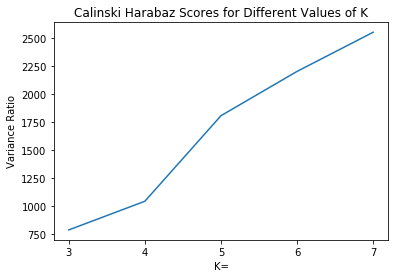

In [17]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title("Calinski Harabaz Scores for Different Values of K")
plt.ylabel("Variance Ratio")
plt.xlabel("K=")
plt.show()

**_Question:_**  Interpret the elbow plot we just created. Where is the "elbow" in this plot? According to this plot, how many clusters do you think actually exist in the dataset we created?

Write your answer below this line:
_______________________________________________________________________________


Let's end by visualizing our `X_2` dataset we created, to see what our data actually looks like.

In the cell below, create a scatterplot to visualize our dataset stored in `X_2`. Set `c=y_2`, so that the plot colors each point according to its ground-truth cluster, and set `s=10` so the points won't be too big. 

We were right! The data does actually contain six clusters. Note that are other types of metrics that can also be used to evaluate the correct value for K, such as silhouette score. However, checking the variance ratio by calculating Calinski Harabaz Scores is one of the most tried-and-true methods, and should definitely be one of the first tools you reach for when trying to figure out the optimal value for K with K-Means Clustering. 

## A Note on Dimensionality

We should also note that for this example, we were able to visualize our data because it only contained two dimensions. In the real world, working with datasets with only two dimensions is quite rare. This means that you can't always visualize your plots to double check your work. For this reason, it's extra important to be considerate about the metrics you use to evaluate the performance of your clustering algorithm, since you won't be able to "eyeball" it to visually check how many clusters the data looks like it has when you're working with datasets that contain hundreds of dimensions!


## Summary

In this lesson, we learned how to use the K-Means Clustering algorithm in scikit-learn. We also learned a strategy for finding the optimal value for K by using elbow plots and variance ratios, for when we're working with data and we don't know how many clusters actually exist. 